<a href="https://colab.research.google.com/github/bharat0710/Assignment--1/blob/main/Copy_of_LaggingRBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf

In [ ]:
#  load the dataset nse nifty data.csv located in Bharat MyDrive and in RBL folder

import pandas as pd
import yfinance as yf
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'
try:
  df = pd.read_csv(file_path)
  print(df.head()) # Check if the file is loaded correctly
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")


Mounted at /content/drive
         Date         Open         High          Low        Close  \
0  2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195   
1  2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902   
2  2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805   
3  2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098   
4  2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000   

     Adj Close  Volume  
0  5232.200195     0.0  
1  5277.899902     0.0  
2  5281.799805     0.0  
3  5263.100098     0.0  
4  5244.750000     0.0  


In [ ]:
# clean and preprocess the data

# Check for missing values
print(df.isnull().sum())

# Fill missing values (example: forward fill)
df.fillna(method='ffill', inplace=True)

# Handle duplicate rows (example: remove duplicates)
df.drop_duplicates(inplace=True)

# Convert date column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as index
df = df.set_index('Date')

# Feature Engineering (Example: Create a new feature 'Daily_Change')
df['Daily_Change'] = df['Close'] - df['Open']

# More preprocessing steps can be added depending on your data
# and the specific requirements of your task.

print(df.head())


Date          0
Open         26
High         26
Low          26
Close        26
Adj Close    26
Volume       26
dtype: int64
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195  5232.200195   
2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902  5277.899902   
2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805   
2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098   
2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000   

            Volume  Daily_Change  
Date                              
2010-01-04     0.0     31.300293  
2010-01-05     0.0      0.750000  
2010-01-06     0.0      3.649903  
2010-01-07     0.0    -18.699707  
2010-01-08     0.0    -19.500000  


<ipython-input-3-189993c20d21>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# normalise the data

# Normalize the 'Close' price column using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Close_Normalized'] = scaler.fit_transform(df[['Close']])

print(df.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195  5232.200195   
2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902  5277.899902   
2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805   
2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098   
2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000   

            Volume  Daily_Change  Close_Normalized  
Date                                                
2010-01-04     0.0     31.300293          0.089032  
2010-01-05     0.0      0.750000          0.094945  
2010-01-06     0.0      3.649903          0.095450  
2010-01-07     0.0    -18.699707          0.093030  
2010-01-08     0.0    -19.500000          0.090656  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          12,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,251 (125.98 KB)

 Trainable params: 32,251 (125.98 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.1779 - val_loss: 0.0579
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0281 - val_loss: 0.0345
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0194 - val_loss: 8.3630e-04
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0152 - val_loss: 0.0035
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0138 - val_loss: 0.0087
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0095 - val_loss: 0.0011
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0093 - val_loss: 8.6494e-04
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0105 - val_loss: 0.0033
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0106 - val_loss: 0.0021
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0094 - val_loss: 7.6725e-04
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0083 - val_loss: 0.0019
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0148 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 60, 50)              │           9,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,501 (95.71 KB)

 Trainable params: 24,501 (95.71 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1802 - val_loss: 0.0921
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0598 - val_loss: 0.0131
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0317 - val_loss: 0.0101
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0169 - val_loss: 0.0139
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0170 - val_loss: 0.0014
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0142 - val_loss: 6.9463e-04
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0126 - val_loss: 0.0013
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0100 - val_loss: 0.0021
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0105 - val_loss: 7.6383e-04
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0089 - val_loss: 6.6335e-04
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0083 - val_loss: 0.0013
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0101 - v

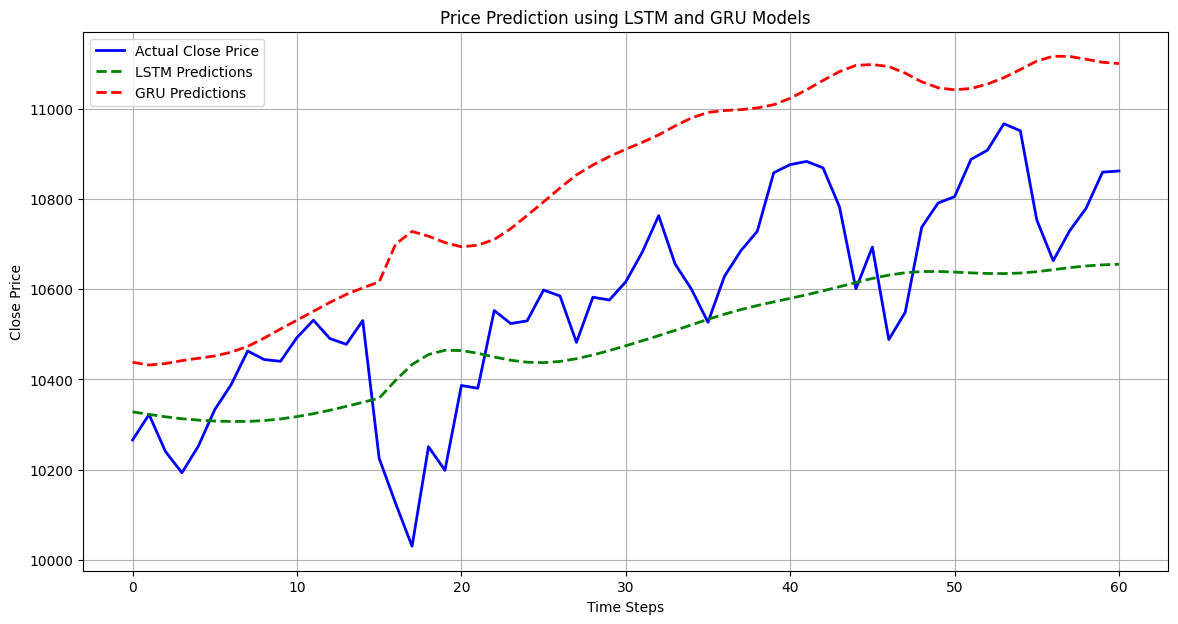

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout

# =============================================================================
# 1. Data Loading and Indicator Calculation
# =============================================================================

# Replace 'data.csv' with your file name (assumed to be uploaded)

file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'

data = pd.read_csv(file_path, parse_dates=['Date'])
data.sort_values('Date', inplace=True)  # Ensure the data is sorted by date

# Reset the index to make 'Date' a column again
df = data.reset_index()



# Convert 'Date' column to datetime, sort by date, and set as index.
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# --- Calculate Exponential Moving Averages (EMA) ---
df['EMA_20']  = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_50']  = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

# --- Calculate Simple Moving Averages (SMA) ---
df['SMA_20']  = df['Close'].rolling(window=20).mean()
df['SMA_50']  = df['Close'].rolling(window=50).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# --- Calculate MACD ---
# MACD is computed as the difference between the 12-period EMA and the 26-period EMA.
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD']   = df['EMA_12'] - df['EMA_26']
# Drop the temporary EMA_12 and EMA_26 columns
df.drop(['EMA_12', 'EMA_26'], axis=1, inplace=True)

# Drop rows with NaN values (which occur at the beginning due to rolling calculations)
df.dropna(inplace=True)

# =============================================================================
# 2. Data Preprocessing and Sequence Creation
# =============================================================================

# Define our nine features (4 EMAs, 4 SMAs, and MACD)
features = ['EMA_20', 'EMA_50', 'EMA_100', 'EMA_200',
            'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'MACD']
# We will use the 'Close' price as the target for prediction.
target = 'Close'

# For simplicity, we scale the features and the target together.
scaler = MinMaxScaler(feature_range=(0, 1))
# Note: The order of columns is important (features first, then target)
data_scaled = scaler.fit_transform(df[features + [target]])

# Define a function to create time-series sequences.
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        # The first len(features) columns (i.e. 9 columns) are our input features.
        X.append(data[i-seq_length:i, :len(features)])
        # The target is the next time step's value of 'Close' (which is the last column)
        y.append(data[i, len(features)])
    return np.array(X), np.array(y)

seq_length = 60  # Use the past 60 timesteps for each prediction
X, y = create_sequences(data_scaled, seq_length)

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# =============================================================================
# 3. Build and Train the LSTM Model
# =============================================================================

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))  # Output layer to predict the 'Close' price

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
print("LSTM Model Summary:")
print(lstm_model.summary())

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train,
                              epochs=20,
                              batch_size=32,
                              validation_data=(X_test, y_test),
                              verbose=1)

# =============================================================================
# 4. Build and Train the GRU Model
# =============================================================================

gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(seq_length, len(features))))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(50))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))  # Output layer

gru_model.compile(optimizer='adam', loss='mean_squared_error')
print("GRU Model Summary:")
print(gru_model.summary())

# Train the GRU model
gru_history = gru_model.fit(X_train, y_train,
                            epochs=20,
                            batch_size=32,
                            validation_data=(X_test, y_test),
                            verbose=1)

# =============================================================================
# 5. Make Predictions and Plot the Results
# =============================================================================

# Generate predictions from both models on the test set
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

# To inverse transform the predictions and actual target values,
# we need to create dummy arrays with the same number of columns as used during scaling.
n_total = len(features) + 1  # 9 features + 1 target = 10 columns

def inverse_transform_predictions(predictions, y_true):
    dummy_pred = np.zeros((predictions.shape[0], n_total))
    dummy_actual = np.zeros((y_true.shape[0], n_total))
    dummy_pred[:, -1] = predictions[:, 0]
    dummy_actual[:, -1] = y_true
    return scaler.inverse_transform(dummy_pred)[:, -1], scaler.inverse_transform(dummy_actual)[:, -1]

lstm_pred_inv, actual_inv = inverse_transform_predictions(lstm_predictions, y_test)
gru_pred_inv, _ = inverse_transform_predictions(gru_predictions, y_test)

# Plot the actual vs predicted Close prices for both models
plt.figure(figsize=(14, 7))
plt.plot(actual_inv, label='Actual Close Price', color='blue', linewidth=2)
plt.plot(lstm_pred_inv, label='LSTM Predictions', color='green', linestyle='--', linewidth=2)
plt.plot(gru_pred_inv, label='GRU Predictions', color='red', linestyle='--', linewidth=2)
plt.title('Price Prediction using LSTM and GRU Models')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


Trial 20 Complete [00h 00m 21s]
val_loss: 0.002957708202302456

Best val_loss So Far: 0.0005826177075505257
Total elapsed time: 00h 06m 10s
Best hyperparameters for GRU:
{'gru_units1': 64, 'dropout_rate': 0.5, 'gru_units2': 96, 'dense_units': 80, 'learning_rate': 0.00027092024792067456}
Training the best GRU model further...
Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0229 - val_loss: 0.0154
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0293 - val_loss: 0.0015
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0243 - val_loss: 0.0039
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0160 - val_loss: 0.0147
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0210 - val_loss: 0.0012
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0164 - val_loss: 0.0022
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0176 - val_loss: 8.7927e-04
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0188 - val_loss: 8.9084e-04
E

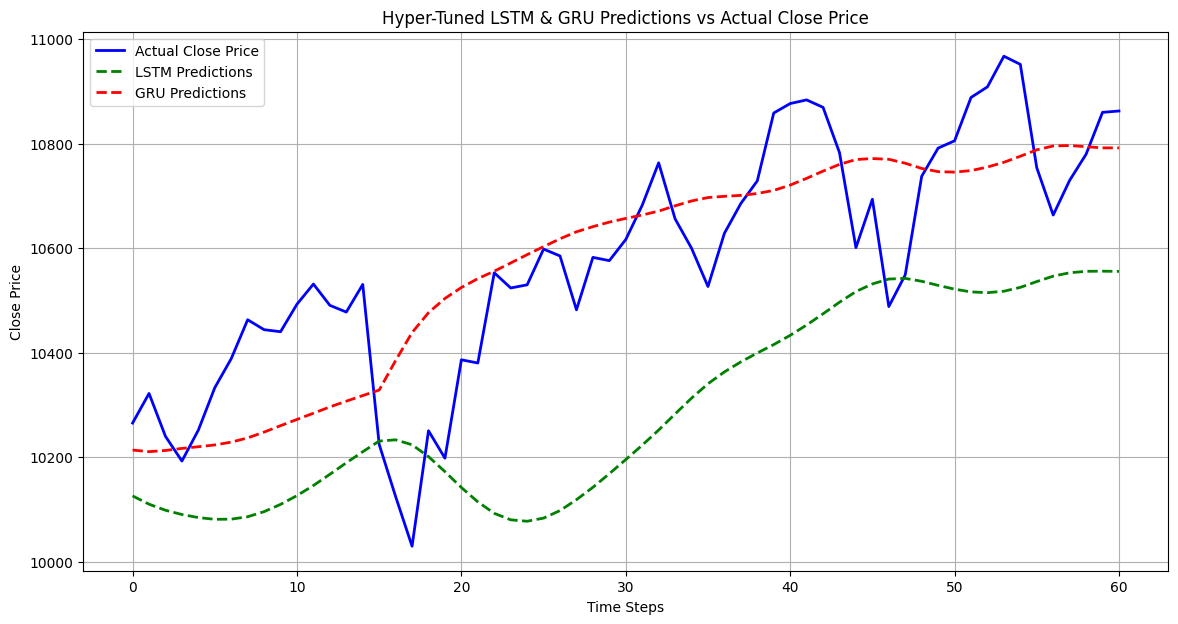

In [2]:
!pip install keras-tuner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# =============================================================================
# 1. Data Loading and Indicator Calculation
# =============================================================================

file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'

data = pd.read_csv(file_path, parse_dates=['Date'])
data.sort_values('Date', inplace=True)  # Ensure the data is sorted by date

# Reset the index to make 'Date' a column again
df = data.reset_index()
# Convert 'Date' column to datetime, sort by date, and set it as index.
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# --- Calculate Exponential Moving Averages (EMA) ---
df['EMA_20']  = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_50']  = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

# --- Calculate Simple Moving Averages (SMA) ---
df['SMA_20']  = df['Close'].rolling(window=20).mean()
df['SMA_50']  = df['Close'].rolling(window=50).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# --- Calculate MACD ---
# MACD = EMA(12) - EMA(26)
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD']   = df['EMA_12'] - df['EMA_26']
df.drop(['EMA_12', 'EMA_26'], axis=1, inplace=True)

# Drop rows with NaN values (generated by the rolling calculations)
df.dropna(inplace=True)

# =============================================================================
# 2. Data Preprocessing and Sequence Creation
# =============================================================================

# Define our 9 features (4 EMAs, 4 SMAs, 1 MACD) and the target (Close).
features = ['EMA_20', 'EMA_50', 'EMA_100', 'EMA_200',
            'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'MACD']
target = 'Close'

# Scale the features and target together.
scaler = MinMaxScaler(feature_range=(0, 1))
# Note: The columns order is [features..., target]
data_scaled = scaler.fit_transform(df[features + [target]])

# Function to create sequences (using the past seq_length timesteps to predict the next target value)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        # The first len(features) columns are the input features.
        X.append(data[i-seq_length:i, :len(features)])
        # The target is the next time step's Close price (last column).
        y.append(data[i, len(features)])
    return np.array(X), np.array(y)

seq_length = 60  # e.g. using the past 60 days for each sample
X, y = create_sequences(data_scaled, seq_length)

# Split into training (80%) and testing (20%) sets.
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
num_features = len(features)  # Should be 9

# =============================================================================
# 3. Hypermodel Builder Functions for LSTM and GRU Models
# =============================================================================

# ----- Hypermodel for LSTM -----
def build_lstm_model(hp):
    model = Sequential()
    # First LSTM layer with tunable units.
    lstm_units1 = hp.Int('lstm_units1', min_value=32, max_value=128, step=32, default=64)
    model.add(LSTM(lstm_units1, return_sequences=True, input_shape=(seq_length, num_features)))
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1, default=0.2)
    model.add(Dropout(dropout_rate))
    # Second LSTM layer.
    lstm_units2 = hp.Int('lstm_units2', min_value=32, max_value=128, step=32, default=64)
    model.add(LSTM(lstm_units2))
    model.add(Dropout(dropout_rate))
    # Dense layer.
    dense_units = hp.Int('dense_units', min_value=16, max_value=128, step=16, default=32)
    model.add(Dense(dense_units, activation='relu'))
    # Output layer.
    model.add(Dense(1))
    # Tunable learning rate.
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log', default=1e-3)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# ----- Hypermodel for GRU -----
def build_gru_model(hp):
    model = Sequential()
    # First GRU layer with tunable units.
    gru_units1 = hp.Int('gru_units1', min_value=32, max_value=128, step=32, default=64)
    model.add(GRU(gru_units1, return_sequences=True, input_shape=(seq_length, num_features)))
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1, default=0.2)
    model.add(Dropout(dropout_rate))
    # Second GRU layer.
    gru_units2 = hp.Int('gru_units2', min_value=32, max_value=128, step=32, default=64)
    model.add(GRU(gru_units2))
    model.add(Dropout(dropout_rate))
    # Dense layer.
    dense_units = hp.Int('dense_units', min_value=16, max_value=128, step=16, default=32)
    model.add(Dense(dense_units, activation='relu'))
    # Output layer.
    model.add(Dense(1))
    # Tunable learning rate.
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log', default=1e-3)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# =============================================================================
# 4. Hyperparameter Tuning using KerasTuner
# =============================================================================

# ----- Tune the LSTM Model -----
tuner_lstm = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=20,             # You can adjust this number
    executions_per_trial=2,    # For stability
    directory='lstm_tuner',
    project_name='lstm_hypertuning'
)

print("Starting hyperparameter tuning for the LSTM model...")
tuner_lstm.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

# Retrieve the best LSTM model and hyperparameters.
best_lstm_model = tuner_lstm.get_best_models(num_models=1)[0]
best_lstm_hyperparams = tuner_lstm.get_best_hyperparameters(num_trials=1)[0].values
print("Best hyperparameters for LSTM:")
print(best_lstm_hyperparams)

# Further train the best LSTM model.
print("Training the best LSTM model further...")
history_lstm = best_lstm_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# ----- Tune the GRU Model -----
tuner_gru = kt.RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=20,             # You can adjust this number
    executions_per_trial=2,
    directory='gru_tuner',
    project_name='gru_hypertuning'
)

print("Starting hyperparameter tuning for the GRU model...")
tuner_gru.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

# Retrieve the best GRU model and hyperparameters.
best_gru_model = tuner_gru.get_best_models(num_models=1)[0]
best_gru_hyperparams = tuner_gru.get_best_hyperparameters(num_trials=1)[0].values
print("Best hyperparameters for GRU:")
print(best_gru_hyperparams)

# Further train the best GRU model.
print("Training the best GRU model further...")
history_gru = best_gru_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# =============================================================================
# 5. Predictions, MSE Calculation, and Plotting Results
# =============================================================================

# Helper function to inverse-transform predictions and true values.
# The scaler was fit on an array with 10 columns ([9 features + target]).
n_total = len(features) + 1  # Should be 10

def inverse_transform_predictions(predictions, y_true, scaler, n_total):
    dummy_pred = np.zeros((predictions.shape[0], n_total))
    dummy_true = np.zeros((y_true.shape[0], n_total))
    dummy_pred[:, -1] = predictions[:, 0]
    dummy_true[:, -1] = y_true
    pred_inv = scaler.inverse_transform(dummy_pred)[:, -1]
    true_inv = scaler.inverse_transform(dummy_true)[:, -1]
    return pred_inv, true_inv

# Generate predictions on the test set from both models.
lstm_preds = best_lstm_model.predict(X_test)
gru_preds = best_gru_model.predict(X_test)

# Inverse transform predictions and actual values.
lstm_preds_inv, actual_inv = inverse_transform_predictions(lstm_preds, y_test, scaler, n_total)
gru_preds_inv, _ = inverse_transform_predictions(gru_preds, y_test, scaler, n_total)

# Calculate Mean Squared Error (MSE) for each model.
mse_lstm = mean_squared_error(actual_inv, lstm_preds_inv)
mse_gru = mean_squared_error(actual_inv, gru_preds_inv)
print("\nLSTM MSE: {:.4f}".format(mse_lstm))
print("GRU MSE: {:.4f}".format(mse_gru))

# Plot Actual vs. Predicted Close Prices.
plt.figure(figsize=(14, 7))
plt.plot(actual_inv, label='Actual Close Price', color='blue', linewidth=2)
plt.plot(lstm_preds_inv, label='LSTM Predictions', color='green', linestyle='--', linewidth=2)
plt.plot(gru_preds_inv, label='GRU Predictions', color='red', linestyle='--', linewidth=2)
plt.title('Hyper-Tuned LSTM & GRU Predictions vs Actual Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


CNN-LSTM Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 58, 64)              │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 29, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 29, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,843 (97.04 KB)

 Trainable params: 24,843 (97.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.1790 - val_loss: 0.0723
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0377 - val_loss: 0.0022
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0198 - val_loss: 0.0042
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150 - val_loss: 0.0046
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - val_loss: 7.7405e-04
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0144 - val_loss: 0.0035
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0157 - val_loss: 0.0018
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0106 - val_loss: 6.7278e-04
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112 - val_loss: 7.5254e-04
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - val_loss: 8.6933e-04
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0089 - val_loss: 7.5077e-04
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

CNN-LSTM Model MSE: 62356.3099


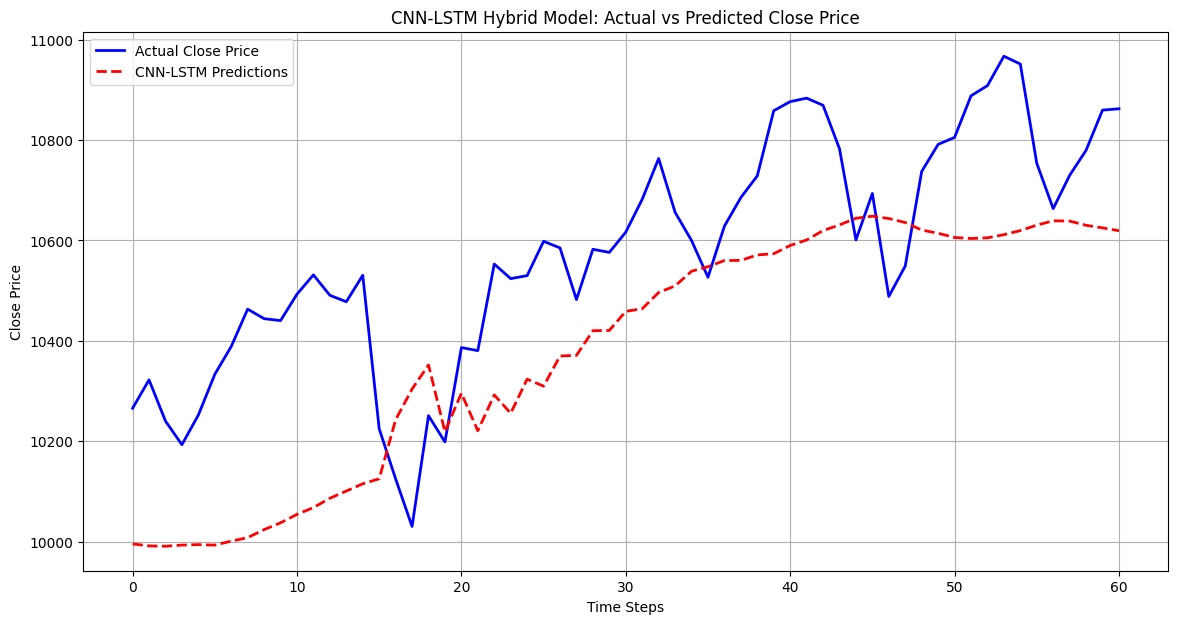

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

# =============================================================================
# 1. Data Loading and Indicator Calculation
# =============================================================================

# Replace 'data.csv' with the path to your CSV file.

file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'

data = pd.read_csv(file_path, parse_dates=['Date'])
data.sort_values('Date', inplace=True)  # Ensure the data is sorted by date

# Reset the index to make 'Date' a column again
df = data.reset_index()
# Convert 'Date' to datetime, sort, and set as index.
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# --- Calculate Exponential Moving Averages (EMA) ---
df['EMA_20']  = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_50']  = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

# --- Calculate Simple Moving Averages (SMA) ---
df['SMA_20']  = df['Close'].rolling(window=20).mean()
df['SMA_50']  = df['Close'].rolling(window=50).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# --- Calculate MACD ---
# MACD = EMA(12) - EMA(26)
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD']   = df['EMA_12'] - df['EMA_26']
df.drop(['EMA_12', 'EMA_26'], axis=1, inplace=True)

# Drop rows with NaN values (from the rolling calculations)
df.dropna(inplace=True)

# =============================================================================
# 2. Data Preprocessing and Sequence Creation
# =============================================================================

# Define the nine features (4 EMAs, 4 SMAs, 1 MACD) and the target ('Close')
features = ['EMA_20', 'EMA_50', 'EMA_100', 'EMA_200',
            'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'MACD']
target = 'Close'

# Scale the features and target together.
# Note: The order is [features..., target] so that the target is in the last column.
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df[features + [target]])

# Create time-series sequences using a fixed window (seq_length).
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        # Use the first len(features) columns as input features.
        X.append(data[i-seq_length:i, :len(features)])
        # The target is the next time step's 'Close' (last column).
        y.append(data[i, len(features)])
    return np.array(X), np.array(y)

seq_length = 60  # e.g., use the past 60 timesteps (days) for each sample
X, y = create_sequences(data_scaled, seq_length)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
num_features = len(features)  # Should be 9

# =============================================================================
# 3. Build the CNN-LSTM Hybrid Model
# =============================================================================

model = Sequential()

# --- Convolutional Part ---
# Conv1D layer extracts local patterns from the input sequences.
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, num_features)))
# Optionally, apply MaxPooling1D to reduce the temporal dimension.
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# --- LSTM Part ---
# LSTM layer captures long-term temporal dependencies.
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

# --- Output Layer ---
model.add(Dense(1))  # Final output: predicted 'Close' price

# Compile the model with Adam optimizer and mean squared error loss.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

print("CNN-LSTM Model Summary:")
model.summary()

# =============================================================================
# 4. Train the CNN-LSTM Model
# =============================================================================

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# =============================================================================
# 5. Make Predictions, Calculate MSE, and Plot the Results
# =============================================================================

# Generate predictions on the test set.
predictions = model.predict(X_test)

# Since the scaler was fitted on an array with 10 columns (9 features + target),
# we create dummy arrays to inverse-transform the predictions and actual values.
n_total = len(features) + 1  # 10 columns

def inverse_transform_predictions(predictions, y_true, scaler, n_total):
    dummy_pred = np.zeros((predictions.shape[0], n_total))
    dummy_true = np.zeros((y_true.shape[0], n_total))
    # Place the predicted values and actual values in the last column.
    dummy_pred[:, -1] = predictions[:, 0]
    dummy_true[:, -1] = y_true
    pred_inv = scaler.inverse_transform(dummy_pred)[:, -1]
    true_inv = scaler.inverse_transform(dummy_true)[:, -1]
    return pred_inv, true_inv

predictions_inv, actual_inv = inverse_transform_predictions(predictions, y_test, scaler, n_total)

# Calculate Mean Squared Error (MSE)
mse_value = mean_squared_error(actual_inv, predictions_inv)
print("\nCNN-LSTM Model MSE: {:.4f}".format(mse_value))

# Plot the actual vs. predicted Close prices.
plt.figure(figsize=(14, 7))
plt.plot(actual_inv, label='Actual Close Price', color='blue', linewidth=2)
plt.plot(predictions_inv, label='CNN-LSTM Predictions', color='red', linestyle='--', linewidth=2)
plt.title('CNN-LSTM Hybrid Model: Actual vs Predicted Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


Trial 20 Complete [00h 00m 18s]
val_loss: 0.0006212807493284345

Best val_loss So Far: 0.000513319915626198
Total elapsed time: 00h 05m 43s
Best Hyperparameters Found:
{'filters': 128, 'kernel_size': 3, 'add_second_conv': True, 'pool_size': 3, 'dropout_conv': 0.5, 'lstm_units': 96, 'dropout_lstm': 0.5, 'dense_units': 32, 'learning_rate': 0.00020439825403773334, 'filters2': 96, 'kernel_size2': 7}
Training the best CNN-LSTM model further...
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0218 - val_loss: 0.0075
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0284 - val_loss: 0.0019
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0206 - val_loss: 0.0034
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0198 - val_loss: 6.2510e-04
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0198 - val_loss: 0.0020
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0202 - val_loss: 5.6315e-04
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0142 - val_loss: 0.0020
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0137 - val_loss: 5.9576e-04
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0180 - val_loss: 0.0014
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0155 - val_loss: 5.1992e-04
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0170 - val_loss: 0.0027
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0134 - val_loss: 0.0

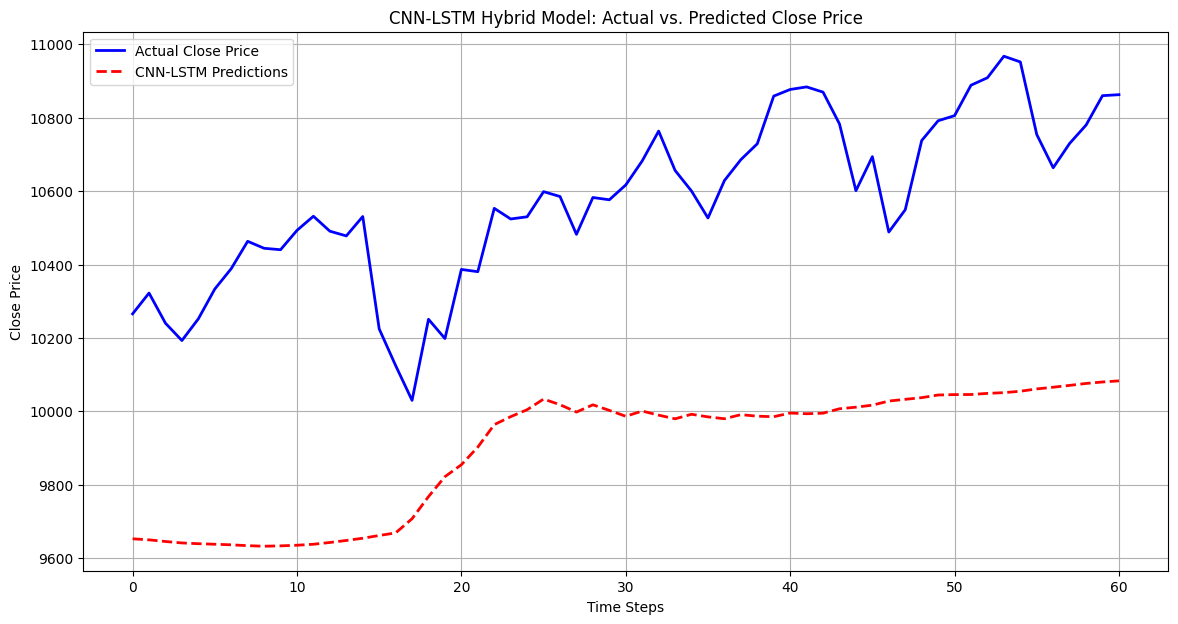

Best CNN-LSTM Hybrid Model saved as best_cnn_lstm_model.h5


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# =============================================================================
# 1. Data Loading and Indicator Calculation
# =============================================================================
file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'

data = pd.read_csv(file_path, parse_dates=['Date'])
data.sort_values('Date', inplace=True)  # Ensure the data is sorted by date

# Reset the index to make 'Date' a column again
df = data.reset_index()

# Convert 'Date' column to datetime, sort the data, and set as index.
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# --- Calculate Exponential Moving Averages (EMA) ---
df['EMA_20']  = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_50']  = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

# --- Calculate Simple Moving Averages (SMA) ---
df['SMA_20']  = df['Close'].rolling(window=20).mean()
df['SMA_50']  = df['Close'].rolling(window=50).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# --- Calculate MACD ---
# MACD = EMA(12) - EMA(26)
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD']   = df['EMA_12'] - df['EMA_26']
df.drop(['EMA_12', 'EMA_26'], axis=1, inplace=True)

# Drop any rows with NaN values (due to rolling calculations)
df.dropna(inplace=True)

# =============================================================================
# 2. Data Preprocessing and Sequence Creation
# =============================================================================

# Define the nine features and the target.
features = ['EMA_20', 'EMA_50', 'EMA_100', 'EMA_200',
            'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'MACD']
target = 'Close'

# Scale the features and target together.
# The columns order is: [features..., target]
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df[features + [target]])

# Helper function to create sequences.
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        # Input features: first len(features) columns.
        X.append(data[i-seq_length:i, :len(features)])
        # Target: next time step's value (last column).
        y.append(data[i, len(features)])
    return np.array(X), np.array(y)

seq_length = 60  # Use past 60 timesteps for each sample.
X, y = create_sequences(data_scaled, seq_length)

# Split into training (80%) and testing (20%) sets.
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
num_features = len(features)  # Should be 9

# =============================================================================
# 3. Hypermodel Builder Function for CNN-LSTM Hybrid Model
# =============================================================================

def build_cnn_lstm_model(hp):
    model = Sequential()
    # --- Convolutional Layers ---
    # Tune number of filters and kernel size for the first Conv1D layer.
    filters = hp.Int('filters', min_value=32, max_value=128, step=32, default=64)
    kernel_size = hp.Choice('kernel_size', values=[3, 5, 7], default=3)
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu',
                     input_shape=(seq_length, num_features)))

    # Optionally add a second Conv1D layer.
    if hp.Boolean("add_second_conv", default=False):
        filters2 = hp.Int('filters2', min_value=32, max_value=128, step=32, default=64)
        kernel_size2 = hp.Choice('kernel_size2', values=[3, 5, 7], default=3)
        model.add(Conv1D(filters=filters2, kernel_size=kernel_size2, activation='relu'))

    # Pooling layer with tunable pool size.
    pool_size = hp.Choice("pool_size", values=[2, 3], default=2)
    model.add(MaxPooling1D(pool_size=pool_size))

    # Dropout after convolutional layers.
    dropout_conv = hp.Float('dropout_conv', min_value=0.1, max_value=0.5, step=0.1, default=0.2)
    model.add(Dropout(dropout_conv))

    # --- LSTM Layer ---
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32, default=50)
    model.add(LSTM(lstm_units, return_sequences=False))
    dropout_lstm = hp.Float('dropout_lstm', min_value=0.1, max_value=0.5, step=0.1, default=0.2)
    model.add(Dropout(dropout_lstm))

    # --- Dense Layers ---
    dense_units = hp.Int('dense_units', min_value=16, max_value=128, step=16, default=32)
    model.add(Dense(dense_units, activation='relu'))
    # Output layer.
    model.add(Dense(1))

    # --- Compile Model ---
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log', default=1e-3)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# =============================================================================
# 4. Hyperparameter Tuning using KerasTuner
# =============================================================================

tuner = kt.RandomSearch(
    build_cnn_lstm_model,
    objective='val_loss',
    max_trials=20,             # Adjust the number of trials as needed.
    executions_per_trial=2,    # More executions for stable results.
    directory='cnn_lstm_tuner',
    project_name='cnn_lstm_hypertuning'
)

print("Starting hyperparameter tuning for the CNN-LSTM hybrid model...")
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

# Retrieve the best model and hyperparameters.
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0].values
print("Best Hyperparameters Found:")
print(best_hyperparameters)

# Further train the best model.
print("Training the best CNN-LSTM model further...")
history = best_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# =============================================================================
# 5. Evaluate the Model: Predictions, MSE Calculation, and Plotting
# =============================================================================

# Helper function to inverse-transform predictions and true values.
# Note: The scaler was fit on an array with 10 columns ([9 features + target]).
n_total = len(features) + 1  # 10 columns

def inverse_transform_predictions(predictions, y_true, scaler, n_total):
    dummy_pred = np.zeros((predictions.shape[0], n_total))
    dummy_true = np.zeros((y_true.shape[0], n_total))
    dummy_pred[:, -1] = predictions[:, 0]
    dummy_true[:, -1] = y_true
    pred_inv = scaler.inverse_transform(dummy_pred)[:, -1]
    true_inv = scaler.inverse_transform(dummy_true)[:, -1]
    return pred_inv, true_inv

# Generate predictions on the test set.
predictions = best_model.predict(X_test)
predictions_inv, actual_inv = inverse_transform_predictions(predictions, y_test, scaler, n_total)

# Calculate Mean Squared Error (MSE).
mse_value = mean_squared_error(actual_inv, predictions_inv)
print("\nCNN-LSTM Model MSE: {:.4f}".format(mse_value))

# Plot Actual vs. Predicted Close Prices.
plt.figure(figsize=(14, 7))
plt.plot(actual_inv, label='Actual Close Price', color='blue', linewidth=2)
plt.plot(predictions_inv, label='CNN-LSTM Predictions', color='red', linestyle='--', linewidth=2)
plt.title('CNN-LSTM Hybrid Model: Actual vs. Predicted Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# =============================================================================
# 6. Save the Best Model
# =============================================================================

best_model.save("best_cnn_lstm_model.h5")
print("Best CNN-LSTM Hybrid Model saved as best_cnn_lstm_model.h5")


LSTM with Attention Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 60, 9)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 60, 64)              │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention (Attention)                │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,217 (98.50 KB)

 Trainable params: 25,217 (98.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.1135 - val_loss: 0.0471
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0490 - val_loss: 0.0372
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0447 - val_loss: 0.0015
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0298 - val_loss: 0.0035
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0273 - val_loss: 0.0044
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0306 - val_loss: 0.0021
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0258 - val_loss: 0.0039
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0260 - val_loss: 0.0069
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0241 - val_loss: 0.0076
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0239 - val_loss: 0.0070
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0173 - val_loss: 0.0103
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0143 - val_loss: 0.0028


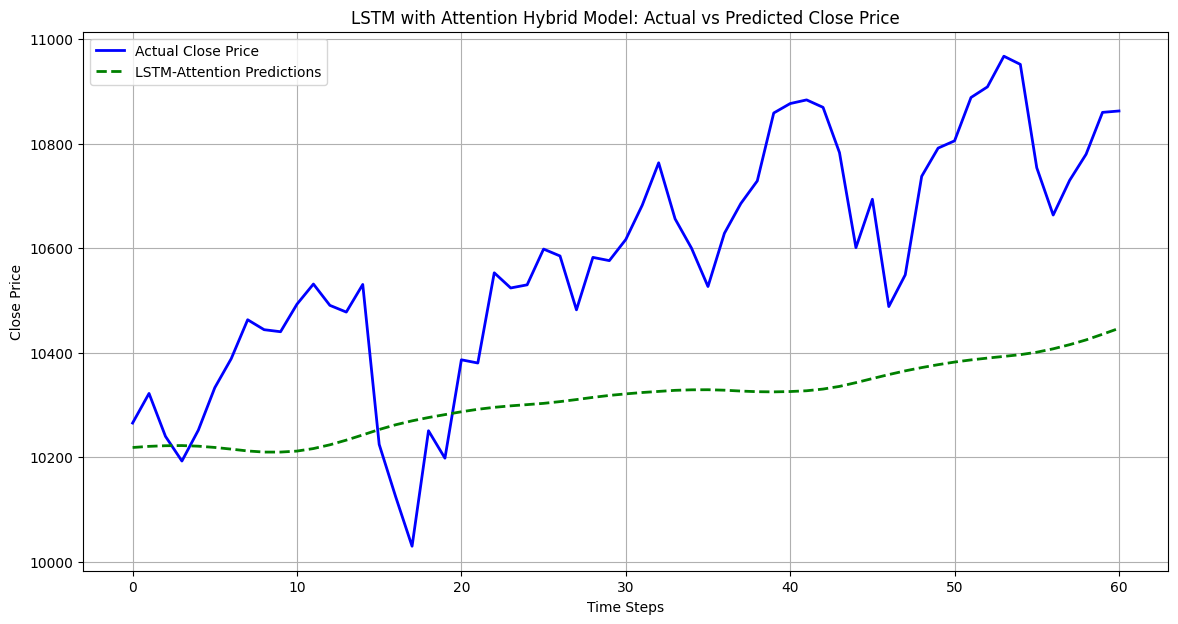

LSTM with Attention Hybrid Model saved as lstm_attention_hybrid_model.h5


In [1]:
import numpy as np.  # this one select
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Layer
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# =============================================================================
# 1. Data Loading and Indicator Calculation
# =============================================================================
file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'

data = pd.read_csv(file_path, parse_dates=['Date'])
data.sort_values('Date', inplace=True)  # Ensure the data is sorted by date

# Reset the index to make 'Date' a column again
df = data.reset_index()

# Convert the 'Date' column to datetime, sort, and set as index.
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# --- Calculate Exponential Moving Averages (EMA) ---
df['EMA_20']  = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_50']  = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

# --- Calculate Simple Moving Averages (SMA) ---
df['SMA_20']  = df['Close'].rolling(window=20).mean()
df['SMA_50']  = df['Close'].rolling(window=50).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# --- Calculate MACD ---
# MACD = EMA(12) - EMA(26)
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD']   = df['EMA_12'] - df['EMA_26']
df.drop(['EMA_12', 'EMA_26'], axis=1, inplace=True)

# Drop rows with missing values (from the rolling calculations)
df.dropna(inplace=True)

# =============================================================================
# 2. Data Preprocessing and Sequence Creation
# =============================================================================

# Define our 9 features and the target.
features = ['EMA_20', 'EMA_50', 'EMA_100', 'EMA_200',
            'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'MACD']
target = 'Close'

# Scale features and target together.
scaler = MinMaxScaler(feature_range=(0, 1))
# Order of columns: features then target.
data_scaled = scaler.fit_transform(df[features + [target]])

# Create sequences: for each sample, use the past seq_length timesteps as features.
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        # The first len(features) columns are used as features.
        X.append(data[i-seq_length:i, :len(features)])
        # The target is the next time step's value (last column).
        y.append(data[i, len(features)])
    return np.array(X), np.array(y)

seq_length = 60  # e.g., use past 60 days to predict the next day
X, y = create_sequences(data_scaled, seq_length)

# Split into training (80%) and testing (20%) sets.
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
num_features = len(features)  # should be 9

# =============================================================================
# 3. Define a Custom Attention Layer
# =============================================================================

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight for attention scoring.
        self.W = self.add_weight(name='att_weight',
                                 shape=(input_shape[-1], input_shape[-1]),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(name='att_bias',
                                 shape=(input_shape[-1],),
                                 initializer='zeros',
                                 trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        # x shape: (batch_size, time_steps, features)
        # Compute attention scores with a tanh activation.
        e = K.tanh(K.dot(x, self.W) + self.b)
        # Compute softmax weights along the time axis.
        a = K.softmax(e, axis=1)
        # Multiply each hidden state with the corresponding attention weight.
        weighted_input = x * a
        # Sum over the time dimension to get a context vector.
        output = K.sum(weighted_input, axis=1)
        return output

    def compute_output_shape(self, input_shape):
        # Output shape: (batch_size, features)
        return (input_shape[0], input_shape[-1])

# =============================================================================
# 4. Build the LSTM with Attention Hybrid Model
# =============================================================================

# Use the Functional API to build the model.
inputs = Input(shape=(seq_length, num_features))
# LSTM layer that outputs sequences.
lstm_out = LSTM(64, return_sequences=True)(inputs)
lstm_out = Dropout(0.2)(lstm_out)
# Apply the custom Attention layer.
attn_out = Attention()(lstm_out)
# Optionally add a Dense layer.
dense_out = Dense(32, activation='relu')(attn_out)
dense_out = Dropout(0.2)(dense_out)
# Final output layer.
outputs = Dense(1)(dense_out)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

print("LSTM with Attention Model Summary:")
model.summary()

# =============================================================================
# 5. Train the Model
# =============================================================================

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# =============================================================================
# 6. Evaluate the Model: Predictions, MSE Calculation, and Plotting
# =============================================================================

# Generate predictions on the test set.
predictions = model.predict(X_test)

# Since the scaler was fit on 10 columns ([9 features + target]),
# we create dummy arrays to properly inverse-transform the predictions and true values.
n_total = len(features) + 1  # should be 10

def inverse_transform_predictions(predictions, y_true, scaler, n_total):
    dummy_pred = np.zeros((predictions.shape[0], n_total))
    dummy_true = np.zeros((y_true.shape[0], n_total))
    # Place the predictions and true values in the last column.
    dummy_pred[:, -1] = predictions[:, 0]
    dummy_true[:, -1] = y_true
    pred_inv = scaler.inverse_transform(dummy_pred)[:, -1]
    true_inv = scaler.inverse_transform(dummy_true)[:, -1]
    return pred_inv, true_inv

predictions_inv, actual_inv = inverse_transform_predictions(predictions, y_test, scaler, n_total)

# Calculate the Mean Squared Error (MSE).
mse_value = mean_squared_error(actual_inv, predictions_inv)
print("\nLSTM with Attention Model MSE: {:.4f}".format(mse_value))

# Plot Actual vs. Predicted Close Prices.
plt.figure(figsize=(14, 7))
plt.plot(actual_inv, label='Actual Close Price', color='blue', linewidth=2)
plt.plot(predictions_inv, label='LSTM-Attention Predictions', color='green', linestyle='--', linewidth=2)
plt.title('LSTM with Attention Hybrid Model: Actual vs Predicted Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# =============================================================================
# 7. Save the Model
# =============================================================================

model.save("lstm_attention_hybrid_model.h5")
print("LSTM with Attention Hybrid Model saved as lstm_attention_hybrid_model.h5")


Trial 20 Complete [00h 00m 19s]
val_loss: 0.0009533001575618982

Best val_loss So Far: 0.0008824820979498327
Total elapsed time: 00h 05m 16s
Best Hyperparameters Found:
{'lstm_units': 64, 'dropout_lstm': 0.30000000000000004, 'add_second_lstm': False, 'dense_units': 48, 'dropout_dense': 0.1, 'learning_rate': 0.0011465968378799715, 'lstm_units2': 64, 'dropout_lstm2': 0.5}
Training the best LSTM with Attention model further...
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0269 - val_loss: 0.0030
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0237 - val_loss: 0.0067
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0266 - val_loss: 0.0036
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0205 - val_loss: 0.0019
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0135 - val_loss: 0.0017
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - val_loss: 0.0050
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0159 - val_loss: 0.0084
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0130 - val_loss: 0.0022
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0102 - val_loss: 0.0104
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0095 - val_loss: 0.0171
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0129 - val_loss: 0.0074
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0108 - val_loss: 0.0135
Epoch 13/30


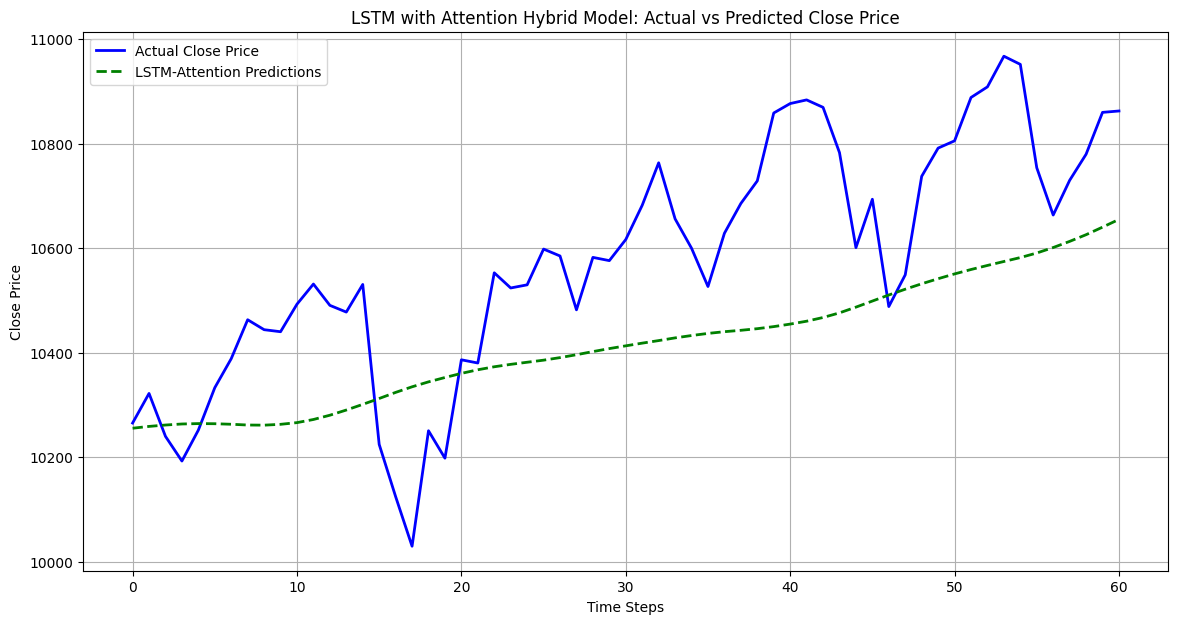

LSTM with Attention Hybrid Model saved as best_lstm_attention_model.h5


In [3]:
!pip install keras-tuner --upgrade
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Layer
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import keras_tuner as kt

# =============================================================================
# 1. Data Loading and Indicator Calculation
# =============================================================================
file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'

data = pd.read_csv(file_path, parse_dates=['Date'])
data.sort_values('Date', inplace=True)  # Ensure the data is sorted by date

# Reset the index to make 'Date' a column again
df = data.reset_index()
# Convert 'Date' to datetime, sort the data, and set as index.
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# --- Calculate Exponential Moving Averages (EMA) ---
df['EMA_20']  = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_50']  = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

# --- Calculate Simple Moving Averages (SMA) ---
df['SMA_20']  = df['Close'].rolling(window=20).mean()
df['SMA_50']  = df['Close'].rolling(window=50).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# --- Calculate MACD ---
# MACD = EMA(12) - EMA(26)
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD']   = df['EMA_12'] - df['EMA_26']
df.drop(['EMA_12', 'EMA_26'], axis=1, inplace=True)

# Drop rows with NaN values (from rolling calculations)
df.dropna(inplace=True)

# =============================================================================
# 2. Data Preprocessing and Sequence Creation
# =============================================================================

# Define our nine features and the target.
features = ['EMA_20', 'EMA_50', 'EMA_100', 'EMA_200',
            'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'MACD']
target = 'Close'

# Scale features and target together.
scaler = MinMaxScaler(feature_range=(0, 1))
# Note: The order of columns is [features..., target]
data_scaled = scaler.fit_transform(df[features + [target]])

# Function to create sequences using a fixed window.
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        # The first len(features) columns are input features.
        X.append(data[i-seq_length:i, :len(features)])
        # The target is the next time step's value (last column).
        y.append(data[i, len(features)])
    return np.array(X), np.array(y)

seq_length = 60  # Use past 60 timesteps for each sample
X, y = create_sequences(data_scaled, seq_length)

# Split the data into training (80%) and testing (20%) sets.
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
num_features = len(features)  # Should be 9

# =============================================================================
# 3. Define a Custom Attention Layer
# =============================================================================

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight for attention scoring.
        self.W = self.add_weight(name='att_weight',
                                 shape=(input_shape[-1], input_shape[-1]),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(name='att_bias',
                                 shape=(input_shape[-1],),
                                 initializer='zeros',
                                 trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        # x shape: (batch_size, time_steps, features)
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        weighted_input = x * a
        # Sum over the time dimension to get the context vector.
        output = K.sum(weighted_input, axis=1)
        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

# =============================================================================
# 4. Hypermodel Builder Function for LSTM with Attention Hybrid Model
# =============================================================================

def build_lstm_attention_model(hp):
    inputs = Input(shape=(seq_length, num_features))

    # First LSTM layer (tunable units)
    lstm_units = hp.Int("lstm_units", min_value=32, max_value=128, step=32, default=64)
    x = LSTM(lstm_units, return_sequences=True)(inputs)
    dropout_lstm = hp.Float("dropout_lstm", min_value=0.1, max_value=0.5, step=0.1, default=0.2)
    x = Dropout(dropout_lstm)(x)

    # Optionally add a second LSTM layer
    if hp.Boolean("add_second_lstm", default=False):
        lstm_units2 = hp.Int("lstm_units2", min_value=32, max_value=128, step=32, default=64)
        x = LSTM(lstm_units2, return_sequences=True)(x)
        dropout_lstm2 = hp.Float("dropout_lstm2", min_value=0.1, max_value=0.5, step=0.1, default=0.2)
        x = Dropout(dropout_lstm2)(x)

    # Apply the custom Attention layer.
    attn_out = Attention()(x)

    # Dense layer with tunable units.
    dense_units = hp.Int("dense_units", min_value=16, max_value=128, step=16, default=32)
    x = Dense(dense_units, activation='relu')(attn_out)
    dropout_dense = hp.Float("dropout_dense", min_value=0.1, max_value=0.5, step=0.1, default=0.2)
    x = Dropout(dropout_dense)(x)

    # Output layer.
    outputs = Dense(1)(x)

    # Tune the learning rate.
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log", default=1e-3)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# =============================================================================
# 5. Hyperparameter Tuning using KerasTuner
# =============================================================================

tuner = kt.RandomSearch(
    build_lstm_attention_model,
    objective='val_loss',
    max_trials=20,             # Increase trials if needed
    executions_per_trial=2,    # For stable results
    directory='lstm_attention_tuner',
    project_name='lstm_attention_hypertuning'
)

print("Starting hyperparameter tuning for the LSTM with Attention hybrid model...")
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

# Retrieve the best model and hyperparameters.
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0].values
print("Best Hyperparameters Found:")
print(best_hyperparameters)

# Further train the best model.
print("Training the best LSTM with Attention model further...")
history = best_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# =============================================================================
# 6. Evaluate the Model: Predictions, MSE Calculation, and Plotting
# =============================================================================

# Since our scaler was fit on 10 columns ([9 features + target]),
# we need to create dummy arrays to inverse-transform the predictions and actual values.
n_total = len(features) + 1  # 10 columns

def inverse_transform_predictions(predictions, y_true, scaler, n_total):
    dummy_pred = np.zeros((predictions.shape[0], n_total))
    dummy_true = np.zeros((y_true.shape[0], n_total))
    dummy_pred[:, -1] = predictions[:, 0]
    dummy_true[:, -1] = y_true
    pred_inv = scaler.inverse_transform(dummy_pred)[:, -1]
    true_inv = scaler.inverse_transform(dummy_true)[:, -1]
    return pred_inv, true_inv

# Generate predictions on the test set.
predictions = best_model.predict(X_test)
predictions_inv, actual_inv = inverse_transform_predictions(predictions, y_test, scaler, n_total)

# Calculate the Mean Squared Error (MSE).
mse_value = mean_squared_error(actual_inv, predictions_inv)
print("\nLSTM with Attention Hybrid Model MSE: {:.4f}".format(mse_value))

# Plot Actual vs. Predicted Close Prices.
plt.figure(figsize=(14, 7))
plt.plot(actual_inv, label='Actual Close Price', color='blue', linewidth=2)
plt.plot(predictions_inv, label='LSTM-Attention Predictions', color='green', linestyle='--', linewidth=2)
plt.title('LSTM with Attention Hybrid Model: Actual vs Predicted Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# =============================================================================
# 7. Save the Best Model
# =============================================================================

best_model.save("best_lstm_attention_model.h5")
print("LSTM with Attention Hybrid Model saved as best_lstm_attention_model.h5")


Transformer + LSTM Hybrid Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 60, 9)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 60, 9)          │          9,993 │ input_layer[0][0],     │
│ (MultiHeadAttention)      │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 60, 9)          │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 60, 9)          │              0 │ input_layer[0][0],     │
│                           │                        │                │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 60, 9)          │             18 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 60, 128)        │          1,280 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 60, 128)        │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 60, 9)          │          1,161 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 60, 9)          │              0 │ layer_normalization[0… │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 60, 9)          │             18 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 64)             │         18,944 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 64)             │              0 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 32)             │          2,080 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 32)             │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             33 │ dropout_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 33,527 (130.96 KB)

 Trainable params: 33,527 (130.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - loss: 0.1449 - val_loss: 0.0131
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - val_loss: 0.0084
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0371 - val_loss: 0.0178
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0320 - val_loss: 0.0255
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0313 - val_loss: 0.0228
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0307 - val_loss: 0.0037
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0308 - val_loss: 0.0433
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0209 - val_loss: 0.0077
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0219 - val_loss: 0.0262
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0181 - val_loss: 0.0099
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0192 - val_loss: 0.0304
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0190 - val_loss: 0.0125

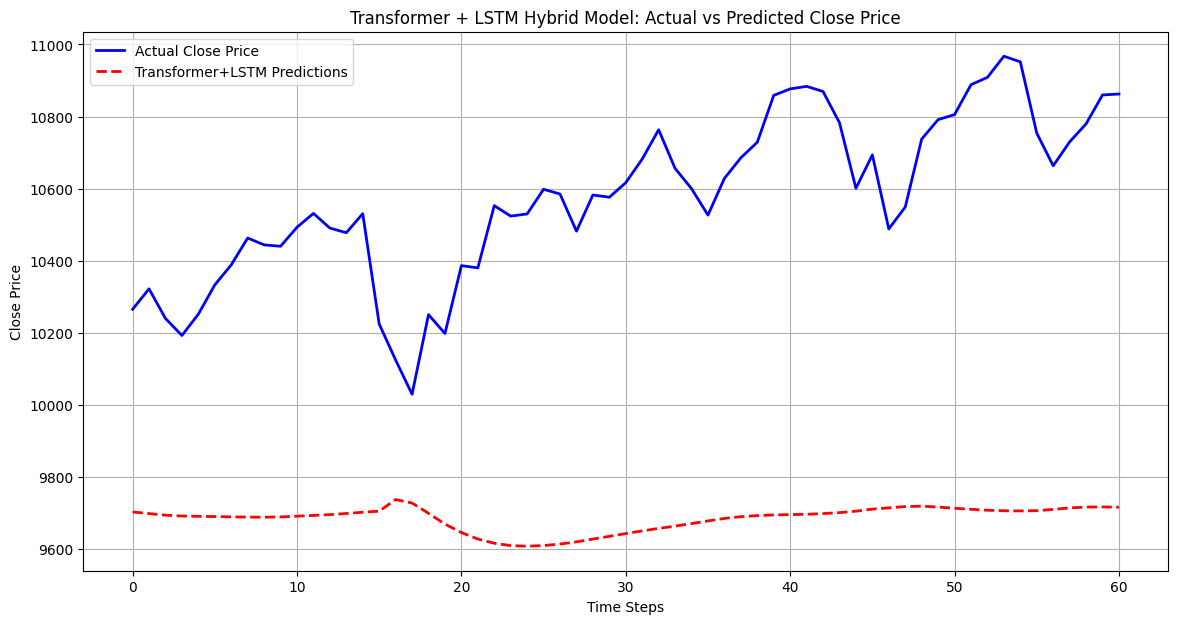

Transformer + LSTM Hybrid Model saved as transformer_lstm_hybrid_model.h5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Layer, LayerNormalization, Conv1D, GlobalAveragePooling1D
from tensorflow.keras.layers import MultiHeadAttention, Add
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# =============================================================================
# 1. Data Loading and Indicator Calculation
# =============================================================================


file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'

data = pd.read_csv(file_path, parse_dates=['Date'])
data.sort_values('Date', inplace=True)  # Ensure the data is sorted by date

# Reset the index to make 'Date' a column again
df = data.reset_index()

# Convert 'Date' column to datetime, sort, and set as index.
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# --- Calculate Exponential Moving Averages (EMA) ---
df['EMA_20']  = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_50']  = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

# --- Calculate Simple Moving Averages (SMA) ---
df['SMA_20']  = df['Close'].rolling(window=20).mean()
df['SMA_50']  = df['Close'].rolling(window=50).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# --- Calculate MACD ---
# MACD = EMA(12) - EMA(26)
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD']   = df['EMA_12'] - df['EMA_26']
df.drop(['EMA_12', 'EMA_26'], axis=1, inplace=True)

# Drop rows with missing values generated by rolling calculations.
df.dropna(inplace=True)

# =============================================================================
# 2. Data Preprocessing and Sequence Creation
# =============================================================================

# Define our nine features (4 EMAs, 4 SMAs, 1 MACD) and target ('Close').
features = ['EMA_20', 'EMA_50', 'EMA_100', 'EMA_200',
            'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'MACD']
target = 'Close'

# Scale features and target together.
scaler = MinMaxScaler(feature_range=(0, 1))
# Note: The order is: features then target.
data_scaled = scaler.fit_transform(df[features + [target]])

# Function to create time-series sequences.
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :len(features)])  # Use only features for input.
        y.append(data[i, len(features)])                # Target is the next 'Close' value.
    return np.array(X), np.array(y)

seq_length = 60  # Using the past 60 timesteps (days) per sample.
X, y = create_sequences(data_scaled, seq_length)

# Split into training (80%) and testing (20%) sets.
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
num_features = len(features)  # should be 9

# =============================================================================
# 3. Build Transformer Encoder Block and Hybrid Transformer + LSTM Model
# =============================================================================

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Multi-Head Attention layer.
    attn_output = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    # Residual connection and Layer Normalization.
    out1 = LayerNormalization(epsilon=1e-6)(Add()([inputs, attn_output]))

    # Feed-forward network.
    ffn = Dense(ff_dim, activation="relu")(out1)
    ffn = Dropout(dropout)(ffn)
    ffn = Dense(inputs.shape[-1])(ffn)
    # Second residual connection and normalization.
    out2 = LayerNormalization(epsilon=1e-6)(Add()([out1, ffn]))
    return out2

# Build the hybrid model using the Functional API.
inputs = Input(shape=(seq_length, num_features))
# Apply a Transformer encoder block.
x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.1)
# Optionally, you can add more Transformer blocks here.
# Pass the output to an LSTM layer.
x = LSTM(64, return_sequences=False)(x)
x = Dropout(0.2)(x)
# Dense layer(s) for further processing.
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
# Output layer for regression.
outputs = Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

print("Transformer + LSTM Hybrid Model Summary:")
model.summary()

# =============================================================================
# 4. Train the Model
# =============================================================================

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# =============================================================================
# 5. Evaluate the Model: Predictions, MSE Calculation, and Plotting
# =============================================================================

# Generate predictions on the test set.
predictions = model.predict(X_test)

# Since the scaler was fit on an array with 10 columns ([9 features + target]),
# create dummy arrays to inverse-transform predictions and actual target values.
n_total = len(features) + 1  # equals 10

def inverse_transform_predictions(predictions, y_true, scaler, n_total):
    dummy_pred = np.zeros((predictions.shape[0], n_total))
    dummy_true = np.zeros((y_true.shape[0], n_total))
    dummy_pred[:, -1] = predictions[:, 0]
    dummy_true[:, -1] = y_true
    pred_inv = scaler.inverse_transform(dummy_pred)[:, -1]
    true_inv = scaler.inverse_transform(dummy_true)[:, -1]
    return pred_inv, true_inv

predictions_inv, actual_inv = inverse_transform_predictions(predictions, y_test, scaler, n_total)

# Calculate Mean Squared Error (MSE)
mse_value = mean_squared_error(actual_inv, predictions_inv)
print("\nTransformer + LSTM Model MSE: {:.4f}".format(mse_value))

# Plot Actual vs. Predicted Close Prices.
plt.figure(figsize=(14, 7))
plt.plot(actual_inv, label='Actual Close Price', color='blue', linewidth=2)
plt.plot(predictions_inv, label='Transformer+LSTM Predictions', color='red', linestyle='--', linewidth=2)
plt.title('Transformer + LSTM Hybrid Model: Actual vs Predicted Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# =============================================================================
# 6. Save the Model
# =============================================================================

model.save("transformer_lstm_hybrid_model.h5")
print("Transformer + LSTM Hybrid Model saved as transformer_lstm_hybrid_model.h5")


Transformer + LSTM Hybrid Model Summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 60, 9)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 60, 9)          │         39,945 │ input_layer_1[0][0],   │
│ (MultiHeadAttention)      │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 60, 9)          │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 60, 9)          │              0 │ input_layer_1[0][0],   │
│                           │                        │                │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 60, 9)          │             18 │ add_2[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 60, 256)        │          2,560 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 60, 256)        │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 60, 9)          │          2,313 │ dropout_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 60, 9)          │              0 │ layer_normalization_2… │
│                           │                        │                │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 60, 9)          │             18 │ add_3[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_2    │ (None, 60, 9)          │         39,945 │ layer_normalization_3… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 60, 9)          │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 60, 9)          │              0 │ layer_normalization_3… │
│                           │                        │                │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_4     │ (None, 60, 9)          │             18 │ add_4[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 60, 256)        │          2,560 │ layer_normalization_4… │
├──────────────────────

 Total params: 247,533 (966.93 KB)

 Trainable params: 247,533 (966.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 499ms/step - loss: 0.2130 - val_loss: 0.0186 - learning_rate: 5.0000e-04
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 606ms/step - loss: 0.0778 - val_loss: 0.0035 - learning_rate: 5.0000e-04
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 351ms/step - loss: 0.0553 - val_loss: 0.0392 - learning_rate: 5.0000e-04
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 355ms/step - loss: 0.0560 - val_loss: 0.0742 - learning_rate: 5.0000e-04
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 434ms/step - loss: 0.0422 - val_loss: 0.0021 - learning_rate: 5.0000e-04
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 352ms/step - loss: 0.0339 - val_loss: 0.0173 - learning_rate: 5.0000e-04
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 499ms/step - loss: 0.0319 - val_loss: 0.0037 - learning_rate: 5.0000e-04
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 354ms/step - loss: 0.0259 - val_loss: 0.0143 - learning_rate: 5.0000e-04
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 349ms/step - loss: 0.0222 - val_loss: 0.0107 - learning_rate: 5.

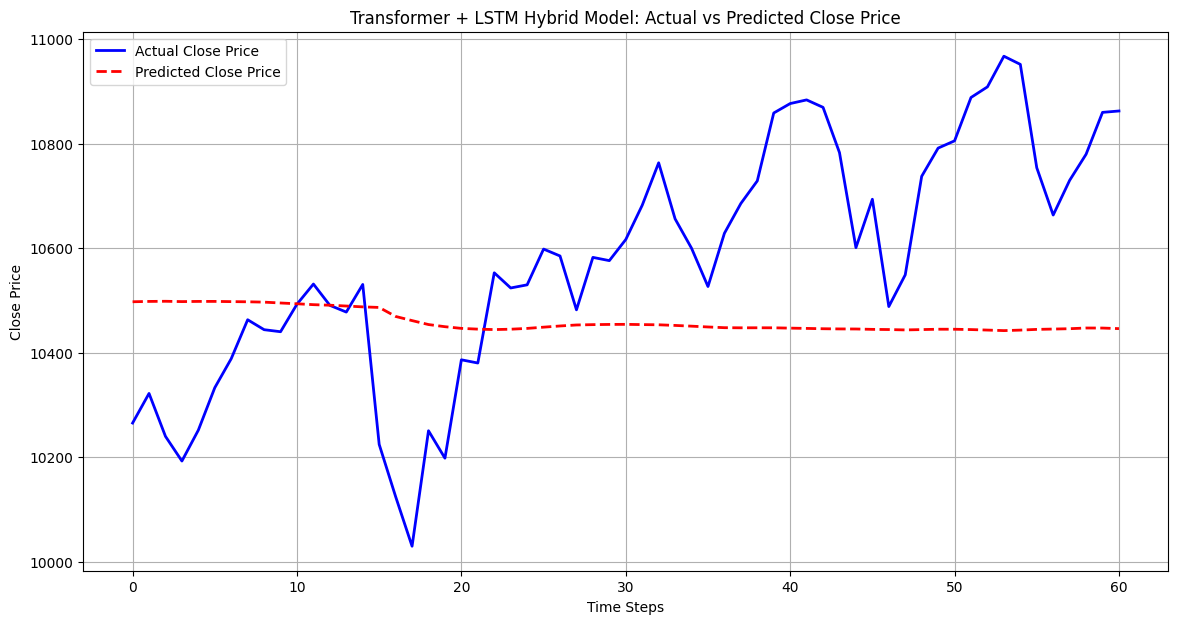

Transformer + LSTM Hybrid Model saved as optimized_transformer_lstm_hybrid_model.h5


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# =============================================================================
# 1. Data Loading and Indicator Calculation
# =============================================================================


file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'

data = pd.read_csv(file_path, parse_dates=['Date'])
data.sort_values('Date', inplace=True)  # Ensure the data is sorted by date

# Reset the index to make 'Date' a column again
df = data.reset_index()
# Convert 'Date' column to datetime, sort, and set as index.
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# --- Calculate Exponential Moving Averages (EMA) ---
df['EMA_20']  = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_50']  = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

# --- Calculate Simple Moving Averages (SMA) ---
df['SMA_20']  = df['Close'].rolling(window=20).mean()
df['SMA_50']  = df['Close'].rolling(window=50).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# --- Calculate MACD ---
# MACD = EMA(12) - EMA(26)
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD']   = df['EMA_12'] - df['EMA_26']
df.drop(['EMA_12', 'EMA_26'], axis=1, inplace=True)

# Drop rows with missing values generated by rolling calculations.
df.dropna(inplace=True)

# =============================================================================
# 2. Data Preprocessing and Sequence Creation
# =============================================================================

# Define our nine features (4 EMAs, 4 SMAs, 1 MACD) and target ('Close').
features = ['EMA_20', 'EMA_50', 'EMA_100', 'EMA_200',
            'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'MACD']
target = 'Close'

# Scale features and target together.
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df[features + [target]])

# Function to create time-series sequences.
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :len(features)])  # Use only features for input.
        y.append(data[i, len(features)])                # Target is the next 'Close' value.
    return np.array(X), np.array(y)

seq_length = 60  # Using the past 60 timesteps (days) per sample.
X, y = create_sequences(data_scaled, seq_length)

# Split into training (80%) and testing (20%) sets.
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
num_features = len(features)  # should be 9

# =============================================================================
# 3. Build Transformer Encoder Block and Hybrid Transformer + LSTM Model
# =============================================================================

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.2):
    # Multi-Head Attention layer.
    attn_output = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    # Residual connection and Layer Normalization.
    out1 = LayerNormalization(epsilon=1e-6)(Add()([inputs, attn_output]))

    # Feed-forward network.
    ffn = Dense(ff_dim, activation="relu")(out1)
    ffn = Dropout(dropout)(ffn)
    ffn = Dense(inputs.shape[-1])(ffn)
    # Second residual connection and normalization.
    out2 = LayerNormalization(epsilon=1e-6)(Add()([out1, ffn]))
    return out2

# Build the hybrid model using the Functional API.
inputs = Input(shape=(seq_length, num_features))

# Stack two Transformer encoder blocks for deeper feature extraction.
x = transformer_encoder(inputs, head_size=128, num_heads=8, ff_dim=256, dropout=0.2)
x = transformer_encoder(x, head_size=128, num_heads=8, ff_dim=256, dropout=0.2)

# Pass the output to a Bidirectional LSTM layer for improved sequential modeling.
x = Bidirectional(LSTM(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.3))(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
# Output layer for regression.
outputs = Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

print("Transformer + LSTM Hybrid Model Summary:")
model.summary()

# =============================================================================
# 4. Train the Model with Callbacks
# =============================================================================

# Use callbacks for learning rate reduction and early stopping.
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_reduction, early_stopping],
                    verbose=1)

# =============================================================================
# 5. Evaluate the Model: Predictions, MSE Calculation, and Plotting
# =============================================================================

# Generate predictions on the test set.
predictions = model.predict(X_test)

# Since the scaler was fit on an array with 10 columns ([9 features + target]),
# create dummy arrays to inverse-transform predictions and actual target values.
n_total = len(features) + 1  # equals 10

def inverse_transform_predictions(predictions, y_true, scaler, n_total):
    dummy_pred = np.zeros((predictions.shape[0], n_total))
    dummy_true = np.zeros((y_true.shape[0], n_total))
    dummy_pred[:, -1] = predictions[:, 0]
    dummy_true[:, -1] = y_true
    pred_inv = scaler.inverse_transform(dummy_pred)[:, -1]
    true_inv = scaler.inverse_transform(dummy_true)[:, -1]
    return pred_inv, true_inv

predictions_inv, actual_inv = inverse_transform_predictions(predictions, y_test, scaler, n_total)

# Calculate Mean Squared Error (MSE)
mse_value = mean_squared_error(actual_inv, predictions_inv)
print("\nTransformer + LSTM Model MSE: {:.4f}".format(mse_value))

# Plot Actual vs. Predicted Close Prices.
plt.figure(figsize=(14, 7))
plt.plot(actual_inv, label='Actual Close Price', color='blue', linewidth=2)
plt.plot(predictions_inv, label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('Transformer + LSTM Hybrid Model: Actual vs Predicted Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# =============================================================================
# 6. Save the Model
# =============================================================================

model.save("optimized_transformer_lstm_hybrid_model.h5")
print("Transformer + LSTM Hybrid Model saved as optimized_transformer_lstm_hybrid_model.h5")


Hybrid Model (GRU + LSTM with Attention) Summary:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 60, 9)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 60, 64)         │         18,944 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru (GRU)                 │ (None, 60, 64)         │         14,400 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 60, 64)         │              0 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_1 (GRU)               │ (None, 64)             │         24,960 │ gru[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 64)             │          4,160 │ dropout_14[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128)            │              0 │ gru_1[0][0],           │
│                           │                        │                │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 64)             │          8,256 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 64)             │              0 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 1)              │             65 │ dropout_15[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 70,785 (276.50 KB)

 Trainable params: 70,785 (276.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 428ms/step - loss: 0.1367 - val_loss: 0.0076
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - loss: 0.0388 - val_loss: 0.0043
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 545ms/step - loss: 0.0295 - val_loss: 0.0032
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - loss: 0.0289 - val_loss: 0.0134
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step - loss: 0.0193 - val_loss: 0.0034
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - loss: 0.0184 - val_loss: 0.0106
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - loss: 0.0181 - val_loss: 0.0050
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - loss: 0.0159 - val_loss: 0.0220
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - loss: 0.0131 - val_loss: 0.0023
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - loss: 0.0178 - val_loss: 0.0097
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - loss: 0.0132 - val_loss: 0.0093
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 296ms/step - loss: 0.0139 - val_l

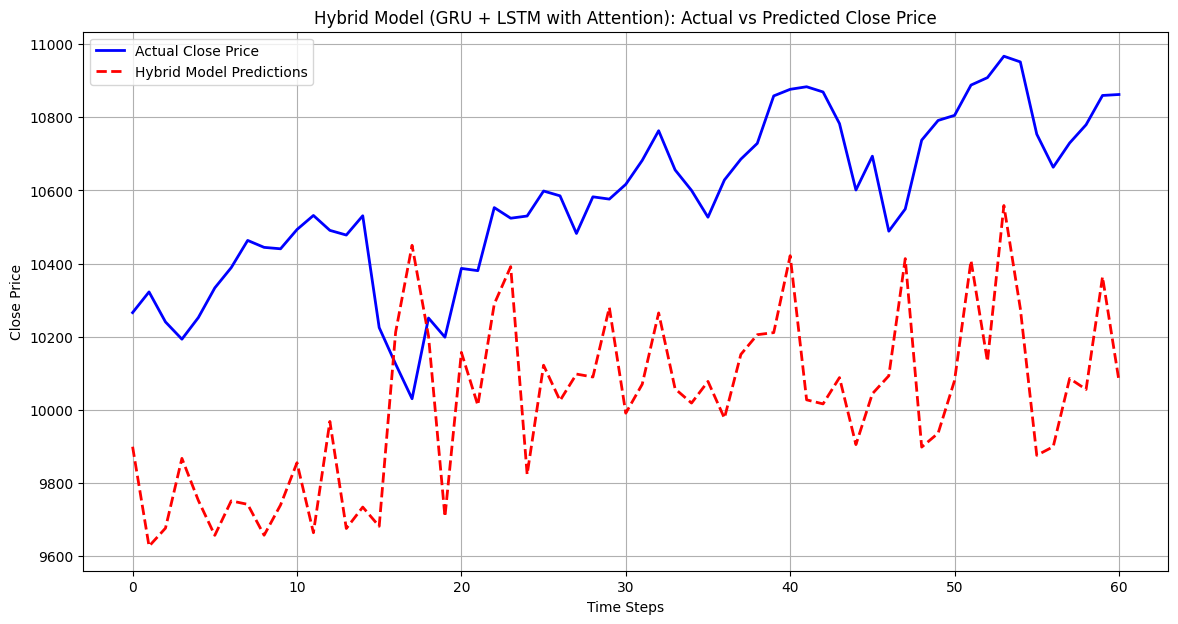

Hybrid model saved as hybrid_gru_lstm_attention_model.h5


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Dropout, Concatenate, Layer
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# =============================================================================
# 1. Data Loading and Indicator Calculation

file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'

data = pd.read_csv(file_path, parse_dates=['Date'])
data.sort_values('Date', inplace=True)  # Ensure the data is sorted by date

# Reset the index to make 'Date' a column again
df = data.reset_index()

# Load the data, parse dates, sort by date, and set the index.
data = pd.read_csv(file_path, parse_dates=['Date'])
data.sort_values('Date', inplace=True)
df = data.copy()
df.set_index('Date', inplace=True)

# --- Calculate Exponential Moving Averages (EMA) ---
df['EMA_20']  = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_50']  = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

# --- Calculate Simple Moving Averages (SMA) ---
df['SMA_20']  = df['Close'].rolling(window=20).mean()
df['SMA_50']  = df['Close'].rolling(window=50).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# --- Calculate MACD ---
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD']   = df['EMA_12'] - df['EMA_26']
df.drop(['EMA_12', 'EMA_26'], axis=1, inplace=True)

# Drop rows with NaN values (produced by the rolling calculations).
df.dropna(inplace=True)

# =============================================================================
# 2. Data Preprocessing and Sequence Creation
# =============================================================================

# Define our 9 features (4 EMAs, 4 SMAs, 1 MACD) and target ('Close').
features = ['EMA_20', 'EMA_50', 'EMA_100', 'EMA_200',
            'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'MACD']
target = 'Close'

# Scale the features and target together.
scaler = MinMaxScaler(feature_range=(0, 1))
# Note: The order is: features then target.
data_scaled = scaler.fit_transform(df[features + [target]])

# Function to create time-series sequences.
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :len(features)])  # use only features
        y.append(data[i, len(features)])                # target is the next 'Close' value
    return np.array(X), np.array(y)

seq_length = 60  # Using the past 60 days for each sample
X, y = create_sequences(data_scaled, seq_length)

# Split into training (80%) and testing (20%) sets.
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
num_features = len(features)  # should be 9

# =============================================================================
# 3. Define a Custom Attention Layer
# =============================================================================

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight for attention scoring.
        self.W = self.add_weight(name='att_weight',
                                 shape=(input_shape[-1], input_shape[-1]),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(name='att_bias',
                                 shape=(input_shape[-1],),
                                 initializer='zeros',
                                 trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        # x shape: (batch_size, time_steps, features)
        e = K.tanh(K.dot(x, self.W) + self.b)       # Compute attention scores.
        a = K.softmax(e, axis=1)                      # Softmax along the time axis.
        weighted_input = x * a                        # Multiply by the attention weights.
        output = K.sum(weighted_input, axis=1)        # Sum over time steps.
        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

# =============================================================================
# 4. Build the Hybrid Model (GRU Branch + LSTM with Attention Branch)
# =============================================================================

# Input layer.
inputs = Input(shape=(seq_length, num_features))

# --- GRU Branch ---
gru_branch = GRU(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(inputs)
gru_branch = GRU(64, dropout=0.2, recurrent_dropout=0.2)(gru_branch)

# --- LSTM with Attention Branch ---
lstm_branch = LSTM(64, return_sequences=True, dropout=0.2)(inputs)
lstm_branch = Dropout(0.2)(lstm_branch)
attn_branch = Attention()(lstm_branch)

# --- Combine Branches ---
combined = Concatenate()([gru_branch, attn_branch])
x = Dense(64, activation='relu')(combined)
x = Dropout(0.2)(x)
outputs = Dense(1)(x)

# Build and compile the model.
hybrid_model = Model(inputs=inputs, outputs=outputs)
hybrid_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

print("Hybrid Model (GRU + LSTM with Attention) Summary:")
hybrid_model.summary()

# =============================================================================
# 5. Train the Hybrid Model
# =============================================================================

history = hybrid_model.fit(X_train, y_train,
                           epochs=30,
                           batch_size=32,
                           validation_data=(X_test, y_test),
                           verbose=1)

# =============================================================================
# 6. Evaluate the Hybrid Model: Predictions, MSE Calculation, and Plotting
# =============================================================================

# Generate predictions on the test set.
predictions = hybrid_model.predict(X_test)

# Because the scaler was fit on an array with 10 columns ([9 features + target]),
# we use dummy arrays to inverse-transform predictions and true values.
n_total = len(features) + 1  # equals 10

def inverse_transform_predictions(predictions, y_true, scaler, n_total):
    dummy_pred = np.zeros((predictions.shape[0], n_total))
    dummy_true = np.zeros((y_true.shape[0], n_total))
    dummy_pred[:, -1] = predictions[:, 0]
    dummy_true[:, -1] = y_true
    pred_inv = scaler.inverse_transform(dummy_pred)[:, -1]
    true_inv = scaler.inverse_transform(dummy_true)[:, -1]
    return pred_inv, true_inv

predictions_inv, actual_inv = inverse_transform_predictions(predictions, y_test, scaler, n_total)

# Calculate Mean Squared Error (MSE).
mse_value = mean_squared_error(actual_inv, predictions_inv)
print("\nHybrid Model MSE: {:.4f}".format(mse_value))

# Plot Actual vs. Predicted Close Prices.
plt.figure(figsize=(14, 7))
plt.plot(actual_inv, label='Actual Close Price', color='blue', linewidth=2)
plt.plot(predictions_inv, label='Hybrid Model Predictions', color='red', linestyle='--', linewidth=2)
plt.title('Hybrid Model (GRU + LSTM with Attention): Actual vs Predicted Close Price')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# =============================================================================
# 7. Save the Hybrid Model
# =============================================================================

hybrid_model.save("hybrid_gru_lstm_attention_model.h5")
print("Hybrid model saved as hybrid_gru_lstm_attention_model.h5")
